In [1]:
import pandas as pd
import numpy as np

In [2]:
games_df = pd.read_csv('boardgames_dataset.csv', sep = ';') #why not use comma?

# Basic Stuff
First I'll take a look at the basic shape of the dataset. How many columns, how many entries, data types and missing values

In [10]:
# Taking a look at the shape
# 20k rows and 14 columns
games_df

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
0,Gloomhaven,2017,1,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '..."
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']"
2,Terraforming Mars,2016,3,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',..."
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']"
4,Brass Birmingham,2018,5,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,2.94392,0.0000,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball']
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,0.00000,0.0000,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes']
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,0.00000,0.0000,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler..."
19998,Dino-Checkers,1989,19999,2,2,30,30,6,20,5.77500,1.76405,0.0000,0,13,['None'],"['Abstract Strategy', 'Childrens Game']",['Area Majority / Influence'],['Animals: Dinosaurs']


In [12]:
games_df.dtypes #All dtypes seem ok (no conversion needed)

name                  object
yearpublished          int64
sortindex              int64
minplayers             int64
maxplayers             int64
minplaytime            int64
maxplaytime            int64
minage                 int64
usersrated             int64
average              float64
stddev               float64
avgweight            float64
numweights             int64
numcomments            int64
boardgamehonor        object
boardgamecategory     object
boardgamemechanic     object
boardgamefamily       object
dtype: object

In [15]:
games_df.isna().sum() # No missing values. Noice.

name                 0
yearpublished        0
sortindex            0
minplayers           0
maxplayers           0
minplaytime          0
maxplaytime          0
minage               0
usersrated           0
average              0
stddev               0
avgweight            0
numweights           0
numcomments          0
boardgamehonor       0
boardgamecategory    0
boardgamemechanic    0
boardgamefamily      0
dtype: int64

# Analizing Variables by themselves
Now I want to look at each variable individually and check their distributions

## yearpublished

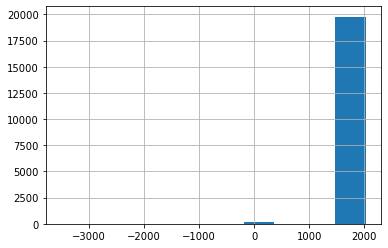

In [19]:
#year plublished
games_df['yearpublished'].hist()

Whe have a few games that the year published is very low. We can investigate further and verify that those are just really old games:

https://en.wikipedia.org/wiki/Senet
https://en.wikipedia.org/wiki/Xiangqi

For these games, we can also see that the year plublished is an estimate. Senet was hardly published precisely on 3500 B.C.


In [23]:
games_df.loc[games_df['yearpublished'] < 1000].sort_values(by= 'yearpublished')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
6826,Senet,-3500,6827,2,2,30,30,6,592,5.89218,1.63069,1.4833,60,285,['None'],"['Abstract Strategy', 'Dice', 'Religious']","['Dice Rolling', 'Roll / Spin and Move']","['Continent: Africa', 'Country: Egypt', 'Gammon']"
1222,Backgammon,-3000,1223,2,2,30,30,8,10704,6.52852,1.59917,2.0183,876,2835,['None'],"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['3M Bookshelf Series', 'Characters: Austin Po..."
19512,Mehen,-3000,19513,2,6,20,20,5,13,5.57692,1.70797,1.0000,1,11,['None'],"['Abstract Strategy', 'Racing']","['Dice Rolling', 'Roll / Spin and Move']",['Ancient Board Games']
18288,Marbles,-3000,18289,0,0,10,10,4,417,4.67789,1.72737,1.1064,47,150,['None'],"['Action / Dexterity', 'Childrens Game', 'Game...","['Action / Dexterity', 'Childrens Game', 'Game...","['Finger Flicking Games', 'Marble Games']"
152,Go,-2200,153,2,2,30,180,8,13752,7.63465,1.91180,3.9956,1353,3514,['None'],['Abstract Strategy'],['Enclosure'],"['3M Bookshelf Series', 'Combinatorial', 'Go',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,Mia,600,10195,2,12,20,20,8,104,6.15096,1.73044,1.1818,11,37,['None'],"['Bluffing', 'Dice']","['Betting and Bluffing', 'Dice Rolling']",['Dice cup bluffing games']
12775,Chaturanga,650,12776,2,4,30,30,8,93,5.93387,1.27079,2.2500,16,55,['None'],['Abstract Strategy'],"['Dice Rolling', 'Grid Movement', 'Player Elim...",['Chess Games']
3731,Kalah,700,3732,2,2,10,10,5,5375,5.88713,1.41687,1.6348,408,1504,['None'],['Abstract Strategy'],['Mancala'],"['Mancala', 'Combinatorial', 'Continent: Afric..."
5987,Go-Moku,700,5988,2,2,5,5,8,510,6.00296,1.73093,1.9038,52,180,['None'],['Abstract Strategy'],['Pattern Building'],"['Combinatorial', 'Go', 'n in a row', 'Ravensb..."


In [25]:
# Lets evaluate by century
games_df['century'] = np.floor(games_df['yearpublished']/100)

# We are not going to be super strict with century nomenclature
# For our dataset years 99 B.C to 99 A.D are going to be century zero. 1900 to 1999 are century 19
# This is wrong according to strict historic nomenclature 

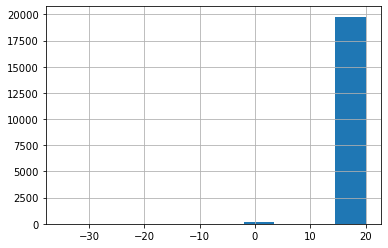

In [26]:
games_df['century'].hist()

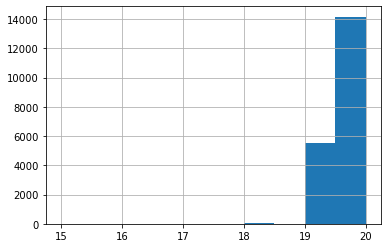

In [28]:
games_df.loc[games_df['century'] >= 15, 'century'].hist()

In [30]:
# Unpublished Prototype; Traditional Card Games? Seems like these dats are actually probably unknown
games_df.loc[games_df['century'] == 0]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,century
1415,Pichenotte,0,1416,2,4,60,60,6,1478,7.00738,1.50184,1.4833,120,401,['None'],['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['Carrom games', 'Finger Flicking Games']",0.0
2570,Unpublished Prototype,0,2571,0,0,0,0,0,705,6.93858,2.46193,2.4667,75,1013,['None'],['(Unpublished)'],['(Unpublished)'],"['Admin: Miscellaneous Placeholder', 'Admin: U...",0.0
2788,Traditional Card Games,0,2789,0,0,0,0,0,813,6.59868,1.68549,1.9683,63,373,['None'],"['Card Game', 'Game System']","['Card Game', 'Game System']","['Admin: Miscellaneous Placeholder', 'Traditio...",0.0
3070,Riichi Mahjong,0,3071,4,4,60,120,8,231,8.36385,1.69289,3.0000,15,54,['None'],['Abstract Strategy'],"['Betting and Bluffing', 'Hand Management', 'S...",['Mahjong'],0.0
3121,Outside the Scope of BGG,0,3122,0,0,0,0,0,547,6.72534,2.18702,1.6582,79,1360,['None'],['(Unknown)'],['(Unknown)'],"['Admin: Miscellaneous Placeholder', 'Admin: O...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19821,Mysteries by Vincent Women Only \u2013 High T...,0,19822,8,8,180,180,18,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19822,The Daisy Diamond Detective Series Episode #1...,0,19823,8,8,180,180,10,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19824,The Daisy Diamond Detective Series Episode #3...,0,19825,8,8,180,180,10,0,0.00000,0.00000,0.0000,0,0,['None'],"['Deduction', 'Murder/Mystery']",['Role Playing'],['Mysteries by Vincent'],0.0
19898,Equate Advanced Tile Set,0,19899,2,4,120,120,0,14,6.35000,1.31570,2.0000,2,9,['None'],"['Educational', 'Expansion for Base-game', 'Ma...",['Tile Placement'],['Equate'],0.0


Only by looking at they year published, I could pick up a few things:

- Most games were published on centuries 19 and 20
- There are about 200 games on century 0. It seems like these are actually games with unkown publishing dates
- My suspicion is that this dataset originally had missing values, but someone replaced missing values with zeroes
- If I'm correct, them we gotta watch out for zeroes in other columns as well (may be missing values)
- Also it's probably going to be a pain in the ass to differentiate between missing values zeroes and true zeroes
- There are some millenia old games as well. In those cases, the year of publishing are estimates and are less meaningfull
- I also noticed looking over the dataset that oriental games enconding problem. Not sure if this is a real problem tough.

A good suggestion to progress with the analisys is to separate modern games from ancient ones and analyze them seperatly as we..

## sortindex
This seem to be a column for sorting. The histogram should look flat and there should be no duplicate values.

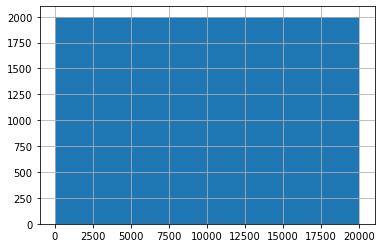

In [4]:
games_df['sortindex'].hist()

In [7]:
games_df['sortindex'].duplicated().any()

False

All in order

## name

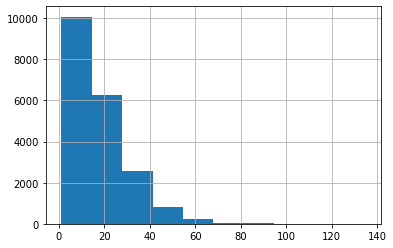

In [14]:
#What are the longest and shortest names?
games_df['name_len'] = games_df['name'].str.len()
games_df['name_len'].hist()

In [15]:
games_df.sort_values(by = 'name_len')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
8920,1,2013,8921,2,8,15,15,6,220,6.07711,1.63805,1.3077,13,54,['None'],"['Card Game', 'Memory', 'Party Game']",['Memory'],"['Chinese edition', 'Multilingual first editio...",1
4075,I,2015,4076,2,4,90,90,13,231,7.28879,1.51541,3.0769,26,89,['None'],"['Bluffing', 'Deduction', 'Spies/Secret Agents...","['Hand Management', 'Point to Point Movement']",['Crowdfunding: Kickstarter'],1
17839,7,2009,17840,2,7,120,120,15,141,5.04901,1.93036,3.1053,19,72,['None'],['Fantasy'],"['Hand Management', 'Set Collection']","['English edition', 'German edition']",1
11525,7,2019,11526,2,5,10,15,14,34,7.33824,1.44365,2.0000,3,10,['None'],"['Deduction', 'Memory']","['Memory', 'Set Collection']",['First edition'],1
3745,M,2000,3746,2,6,30,30,10,605,6.37962,1.31287,1.9615,78,216,['None'],['Abstract Strategy'],['Tile Placement'],['First edition'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,\u041a\u043e\u0448\u043c\u0430\u0440\u0438\u04...,2014,4698,2,5,10,30,10,346,6.51098,1.47362,1.4286,7,53,['None'],"['Card Game', 'Fantasy']","['Hand Management', 'Set Collection']",['Crowdfunding: Kickstarter'],106
1316,Battle Sheep \u0e2a\u0e21\u0e23\u0e20\u0e39\u0...,2010,1317,2,4,15,15,7,3174,6.69298,1.22897,1.4960,125,702,"['2014 Lys Enfant Finalist', '2014 Spiel der S...","['Abstract Strategy', 'Animals']","['Enclosure', 'Grid Movement', 'Modular Board']","['3D Games', 'Animals: Sheep', 'Blue Orange Ga...",109
4524,The Lord of the Rings The Fellowship of the R...,2001,4525,2,2,90,90,12,360,6.53199,1.64978,2.8462,26,129,['None'],"['Fantasy', 'Miniatures', 'Movies / TV / Radio...","['Campaign / Battle Card Driven', 'Modular Boa...",['The Lord of the Rings: Strategy Battle Game'...,110
380,Junk Art \u03b7 \u03a4\u03ad\u03c7\u03bd\u03b...,2016,381,2,6,30,30,8,4321,7.47648,1.22942,1.2642,53,762,['2016 Golden Geek Best Family Board Game Nomi...,"['Action / Dexterity', 'Party Game']","['Hand Management', 'Player Elimination', 'Sta...","['3D Games', 'Games by the Game Artisans of Ca...",127


The longer names seem broken, but a quick google search shows that those are non-latin (Japanese, greek, arabic, etc) Pandas probably can't render, but there is nothing strictly wrong with them. The names with legth one alse seems suspiscious, but there at least some of those games are real:

https://boardgamegeek.com/boardgame/53376/7 <br>
https://boardgamegeek.com/boardgame/872/m

l and 1 are hard to find, but since at least of those games are confirmed to exist, I think it's fair to trust the data

In [24]:
#What about duplicated names?
games_df.loc[games_df['name'].duplicated(keep=False)].sort_values(by='name')

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
17562,1862,1990,17563,1,2,180,180,12,50,4.53000,1.91157,2.4286,7,34,['None'],"['American Civil War', 'Wargame']","['Dice Rolling', 'Hexagon Grid']",['The Battles and Leaders Series'],4
9423,1862,2000,9424,4,7,360,360,12,43,7.23256,1.63660,3.7143,7,11,['None'],"['Economic', 'Trains', 'Transportation']","['Network and Route Building', 'Stock Holding'...","['18xx', 'Country: Canada', 'Country: USA']",4
8492,4 Seasons,2010,8493,2,2,15,15,10,116,6.26164,1.46364,1.8000,5,31,['None'],"['Bluffing', 'Card Game', 'Number']","['Hand Management', 'I Cut']","['Dutch edition', 'English/German first editio...",9
13441,4 Seasons,2016,13442,3,4,30,30,10,33,6.22121,1.18418,2.0000,1,19,['None'],['Card Game'],"['Betting and Bluffing', 'Hand Management', 'T...",['Ninety-Nine'],9
17839,7,2009,17840,2,7,120,120,15,141,5.04901,1.93036,3.1053,19,72,['None'],['Fantasy'],"['Hand Management', 'Set Collection']","['English edition', 'German edition']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,Yeti,2016,4390,2,5,20,40,8,502,6.31912,1.19708,1.6667,15,96,['None'],"['Adventure', 'Dice']","['Dice Rolling', 'Push Your Luck']","['3D Games', 'Bigfoot / Yeti / Sasquatch', 'Sp...",4
9282,Yom Kippur,1983,9283,2,4,120,120,12,57,6.88596,1.17360,3.4444,9,26,['None'],"['Modern Warfare', 'Wargame']",['Hexagon Grid'],['History: Yom Kippur War'],10
3829,Yom Kippur,1995,3830,2,2,240,240,12,324,6.95154,1.31519,2.5833,48,168,['1995 Charles S. Roberts Best Post-World War ...,"['Modern Warfare', 'Wargame']","['Dice Rolling', 'Hexagon Grid']","['History: Yom Kippur War', 'Standard Combat S...",10
2873,Zombie in my Pocket,2007,2874,1,1,5,5,11,1591,6.32216,1.39520,1.3014,209,687,['2009 Golden Geek Best Print & Play Board Gam...,"['Adventure', 'Exploration', 'Fighting', 'Horr...","['Modular Board', 'Pick-up and Deliver', 'Pris...","['...in my Pocket', 'Solitaire Games']",19


All repeated names also have different yearpublished. This smells like different editions to me:

https://boardgamegeek.com/boardgame/33468/zombie-my-pocket/credits <br>
https://boardgamegeek.com/boardgame/41372/zombie-my-pocket/credits

Also the rating of these games on bgg match the rating on the dataset. This indicates that this data was originally scraped from bgg.

The name column have some weird characteristics but it seem like everything has a plausible explanation.

All in order

## minplayers and maxplayers

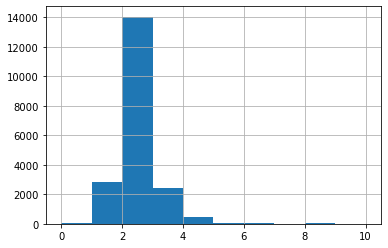

In [29]:
games_df['minplayers'].hist() 

In [32]:
games_df['minplayers'].max() #10. Ok.
games_df['minplayers'].min() # 0? Let's investigate further.

0

In [33]:
games_df.loc[gammes_df['minplayers'] == 0]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
2297,Double Decktet,2008,2298,0,0,30,30,0,472,7.47638,1.44352,1.9655,29,336,['2009 Golden Geek Best Print & Play Board Gam...,"['Card Game', 'Game System', 'Print & Play']","['Card Game', 'Game System', 'Print & Play']",['Decktet Games'],14
2570,Unpublished Prototype,0,2571,0,0,0,0,0,705,6.93858,2.46193,2.4667,75,1013,['None'],['(Unpublished)'],['(Unpublished)'],"['Admin: Miscellaneous Placeholder', 'Admin: U...",21
2788,Traditional Card Games,0,2789,0,0,0,0,0,813,6.59868,1.68549,1.9683,63,373,['None'],"['Card Game', 'Game System']","['Card Game', 'Game System']","['Admin: Miscellaneous Placeholder', 'Traditio...",22
2974,Stonewall Jackson's Way II,2013,2975,0,2,240,720,0,201,8.47761,1.25973,3.7727,22,73,['None'],"['American Civil War', 'Wargame']","['Dice Rolling', 'Hexagon Grid']",['Great Campaigns of the American Civil War'],26
3121,Outside the Scope of BGG,0,3122,0,0,0,0,0,547,6.72534,2.18702,1.6582,79,1360,['None'],['(Unknown)'],['(Unknown)'],"['Admin: Miscellaneous Placeholder', 'Admin: O...",24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19601,Worlds of Heroes & Tyrants Hell,2003,19602,0,0,10,10,8,3,3.00000,1.63299,0.0000,0,2,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],32
19602,Worlds of Heroes & Tyrants Hell Card Expansio...,2003,19603,0,0,10,10,8,1,5.00000,0.00000,0.0000,0,2,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],74
19603,Worlds of Heroes & Tyrants Hell Card Expansio...,2003,19604,0,0,10,10,8,1,5.00000,0.00000,0.0000,0,1,['None'],['Expansion for Base-game'],['Expansion for Base-game'],['Worlds of Heroes & Tyrants'],63
19663,The Cities Game,1970,19664,0,0,60,120,0,10,4.95000,2.35000,2.6667,3,7,['None'],"['City Building', 'Economic', 'Political']","['City Building', 'Economic', 'Political']",['First edition'],15


Rows with zero minplayers tend to also have zeroes in many other columns like yearpublishe, maxplayers, minage. This comes back to the hipotesis that these zeroes were originally missing values. This is data that should probably be removed from the dataset.

Also, we can see a game called "Outside the Scope of BGG". This data is most certainly scraped from BGG.

In [35]:
games_df['maxplayers'].max() #999 players?

999

In [36]:
games_df.sort_values(by='maxplayers').tail(20)

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
127,\u6b61\u8fce\u4f86\u5230,2018,128,1,100,25,25,10,10627,7.65254,1.11049,1.8333,204,1536,['2018 Cardboard Republic Socializer Laurel No...,['City Building'],"['Paper-and-Pencil', 'Pattern Building']","['Roll-and-write', 'Welcome To...']",24
16230,Lumps,2008,16231,1,100,15,0,8,40,5.27500,1.77112,1.0000,5,23,['None'],['Dice'],['Dice Rolling'],"['First edition', 'Second edition']",5
15259,Jetpack Unicorn,2013,15260,3,100,15,15,12,42,5.48214,2.04153,1.0000,3,17,['None'],"['Card Game', 'Humor', 'Party Game']",['Storytelling'],['Crowdfunding: Kickstarter'],15
19183,Karmas,1992,19184,1,100,30,30,9,5,5.80000,1.32665,0.0000,0,3,['None'],['Dice'],['Dice'],['First edition'],6
518,Cartographers A Roll Player Tale,2019,519,1,100,30,45,10,2279,7.69059,1.13448,1.9683,63,453,['None'],"['Fantasy', 'Territory Building']","['Line Drawing', 'Paper-and-Pencil']","['Polyominoes', 'Roll Player', 'Roll-and-write...",33
10243,Floor Plan,2020,10244,1,100,20,40,0,43,6.80233,1.45130,0.0000,0,31,['None'],"['Dice', 'Print & Play', 'Puzzle']","['Dice Rolling', 'Simultaneous Action Selection']","['Admin: Unreleased Games', 'Roll-and-write']",10
18770,They're at the Post,1975,18771,1,100,60,60,10,24,6.35417,2.07404,2.0000,1,16,['None'],"['Racing', 'Sports']",['Betting and Bluffing'],['Sports: Horse Racing'],19
10830,Haggle,1963,10831,10,100,120,300,10,50,6.55244,1.51822,2.1000,10,37,['None'],"['Math', 'Negotiation', 'Puzzle']","['Hand Management', 'Set Collection', 'Trading']",['A Gamut of Games'],6
10645,Rapid Recall,1993,10646,4,100,20,20,16,77,6.19675,1.36905,1.5000,4,37,['None'],"['Memory', 'Party Game']",['Team-Based Game'],['First edition'],12
4202,Prawo D\u017cungli,2007,4203,2,100,10,10,8,441,6.52438,1.55751,1.3939,33,50,['None'],"['Action / Dexterity', 'Card Game', 'Party Game']",['Pattern Recognition'],['First edition'],18


Looking up a few of those games on bgg, some times it looks like there is some sense to the value of max players:

https://boardgamegeek.com/boardgame/3867/hammer-thor-game-norse-mythology<br>

But this is not always true. Values like 999 and 100 are placeholders for games with undefined number of max players.

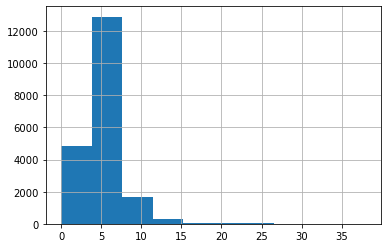

In [43]:
games_df.loc[games_df['maxplayers'] < 40, 'maxplayers'].hist()

Looking at the histogram, the maxplayers number could be clipped to an arbitrary value, like 20, since it's not very realistic to play a board game with 100 or 999 people.

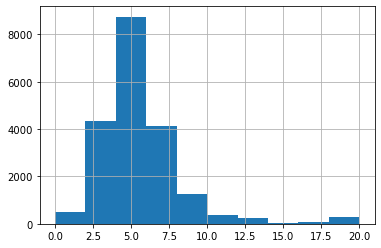

In [54]:
games_df['maxplayers'].clip(0,20).hist()

In [55]:
games_df

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
0,Gloomhaven,2017,1,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '...",10
1,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']",25
2,Terraforming Mars,2016,3,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',...",17
3,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']",45
4,Brass Birmingham,2018,5,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England...",17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Franchise,1990,19996,2,8,90,90,0,3,6.00000,2.94392,0.0000,0,2,['None'],"['Economic', 'Negotiation']","['Simulation', 'Trading']",['Sports: Baseball'],9
19996,Punto y Raya,1988,19997,2,2,20,20,0,1,4.00000,0.00000,0.0000,0,2,['None'],['Abstract Strategy'],['Enclosure'],['Dots and Boxes'],12
19997,3 Up,1972,19998,2,4,20,20,5,1,6.00000,0.00000,0.0000,0,4,['None'],"['Abstract Strategy', 'Childrens Game']",['Pattern Building'],"['Airfix edition', 'Lakeside edition', 'Wexler...",4
19998,Dino-Checkers,1989,19999,2,2,30,30,6,20,5.77500,1.76405,0.0000,0,13,['None'],"['Abstract Strategy', 'Childrens Game']",['Area Majority / Influence'],['Animals: Dinosaurs'],13


## minplaytime and maxplaytime

In [62]:
# different approach for this one
# I noticed a lot of minplaytime == maxplaytime
# Want to see how ofter those are different
# 74.5% of the time

(games_df['minplaytime'] == games_df['maxplaytime']).sum()/len(games_df)

0.7452

In [65]:
# is maiplaytime always >= minplaytime?

(games_df['maxplaytime'] >= games_df['minplaytime']).all()

# Actually not. Probably because of zeroed maxplaytime

False

In [67]:
games_df.loc[(games_df['maxplaytime'] < games_df['minplaytime'])&(games_df['maxplaytime'] != 0)]

,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily,name_len
5359,Clacks A Discworld Board Game,2015,5360,1,4,45,30,8,327,6.30138,1.58865,2.5556,9,81,['None'],"['Abstract Strategy', 'Novel-based']","['Action Points', 'Cooperative Game', 'Pattern...",['Discworld Games'],30
10437,Sotland Yard Hunting Mister X,2011,10438,2,4,25,15,8,207,5.87068,1.42580,1.4615,13,55,['None'],"['Deduction', 'Murder/Mystery', 'Transportation']",['Point to Point Movement'],"['Characters: Mister X', 'Cities: London (Engl...",30


There are actually a couple of games that have maxplaytime < minplaytime. These are actually errors on the website.
https://boardgamegeek.com/boardgame/140279/clacks-discworld-board-game <br>
https://boardgamegeek.com/boardgame/94837/scotland-yard-hunting-mister-x

In [76]:
# How often each of the columsn are equal to zero?
(games_df['minplaytime'] == 0).sum() #534
(games_df['maxplaytime'] == 0).sum() #624
((games_df['minplaytime'] == 0)&(games_df['maxplaytime'] != 0)).sum() #16
((games_df['minplaytime'] != 0)&(games_df['maxplaytime'] == 0)).sum() #106

106

20000